**Goal of Descriptive Analysis step**:
- Skills:
  * Skills Frequencies.
  * Correlation between skills.
- Jobs:
  * Jobs Frequencies.
  * Correlation between jobs.
- Relation between skills and jobs, and specificity of skills to jobs.

In [1]:
JOBS_COL = ['DevType']
# 'YearsCodePro',
TECH_COLS =[ 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
    'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
    'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith']
DF_PATH ='../data/processed/preprocessed_df.pkl'
FIGS_DIR ='../reports/figures'

In [2]:
import pandas as pd
import numpy as np
import os


### Importing dataframe and encoding

In [3]:
pre_df = pd.read_pickle(DF_PATH).loc[:,[*TECH_COLS,*JOBS_COL]]
pre_df.sample(1)

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,DevType
53280,"[Assembly, C, HTML/CSS, JavaScript, PowerShell...",[PostgreSQL],[],"[Angular, Django, jQuery, Node.js, React]",[],[npm],[Visual Studio Code],"Developer, full-stack"


MultiLabelBinarization:
 Similar to one-hot encoding but designed for handling multi-label classification columns.

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

df=pre_df.copy()
encoded_dfs ={}
mlb = MultiLabelBinarizer()
for col in TECH_COLS:
    encoded_dfs[col] = pd.DataFrame(mlb.fit_transform(df[col]),
                               columns=mlb.classes_,
                               index=df[col].index)


In [5]:
from   sklearn.preprocessing import OneHotEncoder
col = 'DevType'
ohe = OneHotEncoder(drop='first')
jobs_encoded = ohe.fit_transform(df.loc[:,[col]])
jobs_cols = ohe.get_feature_names_out([col])
jobs_cols = [name.split('_')[1] for name in jobs_cols]
encoded_dfs[col] = pd.DataFrame(jobs_encoded.toarray(), columns=jobs_cols,index=df[col].index)

In [6]:
combined_df = pd.concat(encoded_dfs, axis=1)
combined_df


LanguageHaveWorkedWith                                                  \
                         APL Ada Apex Assembly Bash/Shell (all shells)  C C#   
1                          0   0    0        0                       0  0  0   
2                          0   0    0        0                       1  0  0   
3                          0   0    0        0                       1  0  0   
4                          0   0    0        0                       0  0  0   
5                          0   0    0        0                       1  0  0   
...                      ...  ..  ...      ...                     ... .. ..   
89178                      0   0    0        0                       0  0  0   
89179                      0   0    0        0                       0  0  0   
89180                      0   0    0        0                       0  0  0   
89182                      0   0    0        0                       1  0  1   
89183                      0   0    0        0                       0  0  1   

                         ...                    DevType                      \
      C++ Clojure Cobol  ... Engineer, site reliability Engineering manager   
1       0       0     0  ...                        0.0                 0.0   
2       0       0     0  ...                        0.0                 0.0   
3       0       0     0  ...                        0.0                 0.0   
4       0       0     0  ...                        0.0                 0.0   
5       0       0     0  ...                        0.0                 0.0   
...    ..     ...   ...  ...                        ...                 ...   
89178   0       0     0  ...                        0.0                 0.0   
89179   0       0     0  ...                        0.0                 0.0   
89180   0       0     0  ...                        0.0                 0.0   
89182   0       0     0  ...                        0.0                 0.0   
89183   0       0     0  ...                        0.0                 0.0   

                                                         \
      Hardware Engineer Product manager Project manager   
1                   0.0             0.0             0.0   
2                   0.0             0.0             0.0   
3                   0.0             0.0             0.0   
4                   0.0             0.0             0.0   
5                   0.0             0.0             0.0   
...                 ...             ...             ...   
89178               0.0             0.0             0.0   
89179               0.0             0.0             0.0   
89180               0.0             0.0             0.0   
89182               0.0             0.0             0.0   
89183               0.0             0.0             0.0   

                                                                   \
      Research & Development role Scientist Security professional   
1                             0.0       0.0                   0.0   
2                             0.0       0.0                   0.0   
3                             0.0       0.0                   0.0   
4                             0.0       0.0                   0.0   
5                             0.0       0.0                   0.0   
...                           ...       ...                   ...   
89178                         0.0       0.0                   0.0   
89179                         0.0       0.0                   0.0   
89180                         0.0       0.0                   0.0   
89182                         0.0       0.0                   0.0   
89183                         0.0       0.0                   0.0   

                                                                 
      Senior Executive (C-Suite, VP, etc.) System administrator  
1                                      1.0                  0.0  
2                                      0.0                  0.0  
3      

### Jobs frequency

Observation:
  - Classes are unbalanced. 

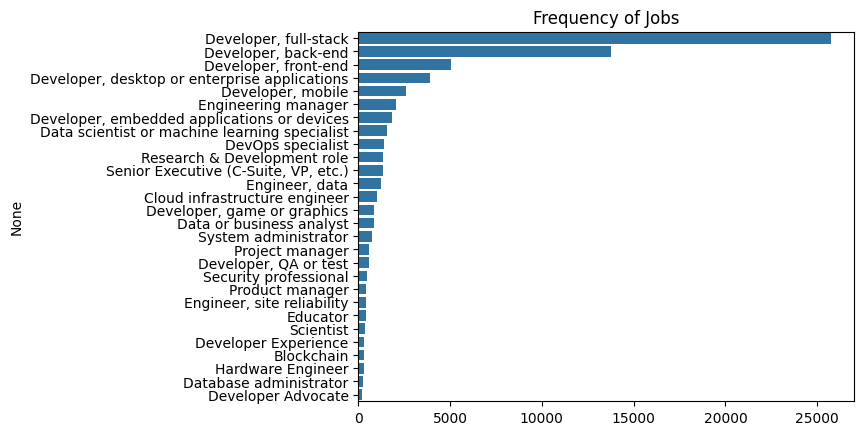

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

job_freq = combined_df.loc[:,['DevType']].sum().sort_values(ascending=False) 
sns.barplot(x=job_freq['DevType'].values, y=job_freq['DevType'].index)
plt.title('Frequency of Jobs')
# Save the figure as a SVG file
plt.savefig(os.path.join(FIGS_DIR,'frequency_of_jobs.svg'))
plt.show()


### Skills frequency

In [8]:
skills_freq = combined_df.drop(columns=['DevType']).sum().reset_index()
skills_freq

,level_0,level_1,0
0,LanguageHaveWorkedWith,APL,118
1,LanguageHaveWorkedWith,Ada,495
2,LanguageHaveWorkedWith,Apex,490
3,LanguageHaveWorkedWith,Assembly,2891
4,LanguageHaveWorkedWith,Bash/Shell (all shells),23128
...,...,...,...
265,NEWCollabToolsHaveWorkedWith,Visual Studio,19808
266,NEWCollabToolsHaveWorkedWith,Visual Studio Code,51697
267,NEWCollabToolsHaveWorkedWith,WebStorm,5341
268,NEWCollabToolsHaveWorkedWith,Xcode,7041


In [9]:
skills_freq.columns=['SkillType','Skill','Count']
skills_freq.sort_values(by='Count',ascending=False)

,SkillType,Skill,Count
266,NEWCollabToolsHaveWorkedWith,Visual Studio Code,51697
24,LanguageHaveWorkedWith,JavaScript,45698
21,LanguageHaveWorkedWith,HTML/CSS,36948
189,ToolsTechHaveWorkedWith,Docker,36575
43,LanguageHaveWorkedWith,SQL,36357
...,...,...,...
229,ToolsTechHaveWorkedWith,snitch,39
225,ToolsTechHaveWorkedWith,lest,36
182,ToolsTechHaveWorkedWith,CUTE,34
190,ToolsTechHaveWorkedWith,ELFspy,26


In [10]:
import plotly.express as px
fig = px.treemap(skills_freq, 
                 path=['SkillType', 'Skill'], 
                 color_continuous_scale='deep',
                 values='Count',color='Count')

fig.update_layout(width=1400, height=700)
# save plot as html file to view the interactive elements of the plot in a web browser
fig.to_html( os.path.join(FIGS_DIR,'skills_freq_treemap.html'))
fig.show()


### Jobs & Skills relations 

In [11]:
df = combined_df.copy()


In [12]:
sorted_jobs = df.loc[:,['DevType']].sum().sort_values(ascending=False).index.tolist()
sorted_jobs = [job for job_type, job in sorted_jobs ]

In [13]:
sorted_skills = df.drop(columns=['DevType']).sum().sort_values(ascending=False)
sorted_skills=sorted_skills.index.droplevel(level=0).tolist()

In [14]:
skills_jobs_matrix ={}
for job in sorted_jobs:
    job_mask = (df.loc[:,('DevType',job)] ==1)
    job_count =float(job_mask.sum())
    skills_job = (df.drop(columns=['DevType']).loc[job_mask,:].sum() /job_count)
    skills_job.index= skills_job.index.droplevel(level=0)
    skills_jobs_matrix[job] =skills_job[sorted_skills].values

skills_jobs_df= pd.DataFrame(skills_jobs_matrix,columns=sorted_jobs,index=sorted_skills).T
skills_jobs_df

,Visual Studio Code,JavaScript,HTML/CSS,Docker,SQL,npm,Python,PostgreSQL,Amazon Web Services (AWS),TypeScript,...,TiDB,build2,Raku,condo,tunit,snitch,lest,CUTE,ELFspy,liblittletest
"Developer, full-stack",0.793316,0.854323,0.718399,0.552555,0.623936,0.645813,0.395726,0.485720,0.453662,0.598485,...,0.000777,0.000971,0.000777,0.000738,0.000389,0.000194,0.000039,0.000194,0.000233,0.000039
"Developer, back-end",0.664896,0.501055,0.340706,0.631502,0.532921,0.372354,0.442852,0.538669,0.518589,0.301782,...,0.002037,0.000728,0.001382,0.000582,0.000218,0.000218,0.000291,0.000146,0.000146,0.000000
"Developer, front-end",0.848551,0.916190,0.794321,0.369355,0.245119,0.709919,0.211595,0.278249,0.334845,0.704200,...,0.000394,0.000592,0.000592,0.000197,0.000197,0.000394,0.000592,0.000394,0.000000,0.000000
"Developer, desktop or enterprise applications",0.606814,0.413934,0.346311,0.273309,0.489754,0.212602,0.371158,0.235656,0.212090,0.181352,...,0.001281,0.002305,0.001281,0.001281,0.001537,0.001281,0.000256,0.000768,0.000768,0.000512
"Developer, mobile",0.613015,0.359646,0.248749,0.210628,0.234886,0.260685,0.249519,0.190605,0.266846,0.190990,...,0.001925,0.001155,0.001540,0.001155,0.001540,0.001155,0.001155,0.002310,0.001155,0.001155
Engineering manager,0.721594,0.658633,0.465814,0.624693,0.536645,0.501722,0.470241,0.520905,0.604525,0.446631,...,0.000984,0.001476,0.000492,0.000984,0.000492,0.000000,0.000492,0.000000,0.000000,0.000000
"Developer, embedded applications or devices",0.689973,0.300271,0.224932,0.424932,0.194038,0.154472,0.687263,0.189702,0.192954,0.125203,...,0.000000,0.004878,0.001084,0.000000,0.000000,0.000542,0.001084,0.000000,0.000000,0.000000
Data scientist or machine learning specialist,0.730479,0.313602,0.280227,0.514484,0.554156,0.192065,0.936398,0.418136,0.509446,0.125315,...,0.000630,0.001259,0.001259,0.006927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DevOps specialist,0.760634,0.526316,0.390050,0.775775,0.483778,0.446287,0.715934,0.559481,0.591925,0.311464,...,0.005047,0.002884,0.002163,0.001442,0.000721,0.000000,0.000721,0.000721,0.001442,0.000000
Research & Development role,0.654841,0.407982,0.331855,0.492979,0.365115,0.263119,0.696970,0.334812,0.337768,0.212860,...,0.000739,0.003695,0.003695,0.004435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The heatmap shows the correlation between the skills and the jobs.

In [15]:

import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=skills_jobs_df, x=skills_jobs_df.columns,y=skills_jobs_df.index, colorscale='magma', ygap=1))
fig.update_layout(width=4500, height=800)
fig.show()
fig.write_html(os.path.join(FIGS_DIR, 'jobs_skills_heatmap.html'))


Normalizing skills, to highlight the skills that are unique for each job.


In [39]:
# create standatrd scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

skills_jobs_df_scaled = scaler.fit_transform(skills_jobs_df)
skills_jobs_df_scaled = pd.DataFrame(skills_jobs_df_scaled,columns=skills_jobs_df.columns,index=skills_jobs_df.index)
# create heatmap for skills_jobs_df_scaled
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=skills_jobs_df_scaled, x=skills_jobs_df_scaled.columns,y=skills_jobs_df_scaled.index, colorscale='magma', ygap=1))
fig.update_layout(width=4500, height=800)
fig.show()
# save fig 
fig.write_html(os.path.join(FIGS_DIR, 'jobs_skills_heatmap_scaled.html'))

In [40]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(skills_jobs_df,labels=sorted_jobs ,orientation='left')
fig.update_layout(width=700,height=600)
fig.show()
fig.write_html(os.path.join(FIGS_DIR,'jobs_hierarchy.html'))